## Fix n_s bias
We're overpredicting n_s in the lightcone summaries, and I'm here to fix it.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import os
from os.path import join
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
mpl.style.use('./style.mcstyle')   # noqa
import numpy as np
import torch
import seaborn as sns
import pandas as pd
import warnings
from tqdm import tqdm

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
wdir = '/anvil/scratch/x-mho1/cmass-ili'
cosmonames = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', r'$n_s$', r'$\sigma_8$']
hodnames = [r'$\alpha$', r'$\log M_0$', r'$\log M_1$',
            r'$\log M_{\min}$', r'$\sigma_{\log M}$']
names = cosmonames  # +hodnames

In [3]:
from cmass.infer.loaders import get_cosmo, get_noise_params, load_lc_Pk, get_hod_params

# Specify model configuration
nbody = 'quijotelike'
sim = 'fastpm_recnoise'
L, N = 1000, 128
suite_dir = join(wdir, nbody, sim, f'L{L}-N{N}')

lhid = 665
hodseed = 1
augseed = 0
tracer = 'simbig_lightcone'
include_hod, include_noise = False, True
simpath = join(suite_dir, str(lhid))
filepath = join(simpath, 'diag', tracer,
                f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')

fparams = [
    get_cosmo(simpath), get_noise_params(filepath), get_hod_params(filepath)
]
fsumms = load_lc_Pk(filepath)
fparams

[array([0.2485 , 0.05797, 0.8681 , 1.0489 , 0.7017 ]),
 array([1.58899167, 0.71192102]),
 array([ 0.48081525,  0.49683869,  0.43257072,  1.42722206, 14.56664984,
        13.45700307, 13.43678126, 13.15120223, 13.56354532, 13.56500851,
        12.94963042, 13.54981632, 13.08751306,  0.24055817,  0.09967476,
         0.45228514])]

In [4]:
# Specify model configuration
nbody = 'quijote'
sim = 'nbody_0.5noise'
L, N = 1000, 128
suite_dir = join(wdir, nbody, sim, f'L{L}-N{N}')

# lhid = 663
tracer = 'simbig_lightcone'
include_hod, include_noise = False, True
simpath = join(suite_dir, str(lhid))
filepath = join(simpath, 'diag', tracer,
                f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')

qparams = [
    get_cosmo(simpath), get_noise_params(filepath), get_hod_params(filepath)
]
qsumms = load_lc_Pk(filepath)
qparams

[array([0.2485 , 0.05797, 0.8681 , 1.0489 , 0.7017 ]),
 array([0.5, 0.5]),
 array([ 0.48081525,  0.49683869,  0.43257072,  1.42722206, 14.56664984,
        13.45700307, 13.43678126, 13.15120223, 13.56354532, 13.56500851,
        12.94963042, 13.54981632, 13.08751306,  0.24055817,  0.09967476,
         0.45228514])]

In [5]:
# Specify model configuration
nbody = 'quijote'
sim = 'nbody_nonoise'
L, N = 1000, 128
suite_dir = join(wdir, nbody, sim, f'L{L}-N{N}')

# lhid = 663
tracer = 'simbig_lightcone'
include_hod, include_noise = False, True
simpath = join(suite_dir, str(lhid))
filepath = join(simpath, 'diag', tracer,
                f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')

nparams = [
    get_cosmo(simpath), get_noise_params(filepath), get_hod_params(filepath)
]
nsumms = load_lc_Pk(filepath)
nparams

[array([0.2485 , 0.05797, 0.8681 , 1.0489 , 0.7017 ]),
 array([0., 0.]),
 array([ 0.48081525,  0.49683869,  0.43257072,  1.42722206, 14.56664984,
        13.45700307, 13.43678126, 13.15120223, 13.56354532, 13.56500851,
        12.94963042, 13.54981632, 13.08751306,  0.24055817,  0.09967476,
         0.45228514])]

In [6]:
# Specify model configuration
nbody = 'quijote'
sim = 'nbody_2noise'
L, N = 1000, 128
suite_dir = join(wdir, nbody, sim, f'L{L}-N{N}')

# lhid = 663
tracer = 'simbig_lightcone'
include_hod, include_noise = False, True
simpath = join(suite_dir, str(lhid))
filepath = join(simpath, 'diag', tracer,
                f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')

tparams = [
    get_cosmo(simpath), get_noise_params(filepath), get_hod_params(filepath)
]
tsumms = load_lc_Pk(filepath)
tparams

[array([0.2485 , 0.05797, 0.8681 , 1.0489 , 0.7017 ]),
 array([2., 2.]),
 array([ 0.48081525,  0.49683869,  0.43257072,  1.42722206, 14.56664984,
        13.45700307, 13.43678126, 13.15120223, 13.56354532, 13.56500851,
        12.94963042, 13.54981632, 13.08751306,  0.24055817,  0.09967476,
         0.45228514])]

In [7]:
# Specify model configuration
nbody = 'quijote'
sim = 'nbody_4noise'
L, N = 1000, 128
suite_dir = join(wdir, nbody, sim, f'L{L}-N{N}')

# lhid = 663
tracer = 'simbig_lightcone'
include_hod, include_noise = False, True
simpath = join(suite_dir, str(lhid))
filepath = join(simpath, 'diag', tracer,
                f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')

oparams = [
    get_cosmo(simpath), get_noise_params(filepath), get_hod_params(filepath)
]
osumms = load_lc_Pk(filepath)
oparams

[array([0.2485 , 0.05797, 0.8681 , 1.0489 , 0.7017 ]),
 array([4., 4.]),
 array([ 0.48081525,  0.49683869,  0.43257072,  1.42722206, 14.56664984,
        13.45700307, 13.43678126, 13.15120223, 13.56354532, 13.56500851,
        12.94963042, 13.54981632, 13.08751306,  0.24055817,  0.09967476,
         0.45228514])]

In [8]:
# Specify model configuration
nbody = 'quijote'
sim = 'nbody_6noise'
L, N = 1000, 128
suite_dir = join(wdir, nbody, sim, f'L{L}-N{N}')

# lhid = 663
tracer = 'simbig_lightcone'
include_hod, include_noise = False, True
simpath = join(suite_dir, str(lhid))
filepath = join(simpath, 'diag', tracer,
                f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')

sparams = [
    get_cosmo(simpath), get_noise_params(filepath), get_hod_params(filepath)
]
ssumms = load_lc_Pk(filepath)
sparams

[array([0.2485 , 0.05797, 0.8681 , 1.0489 , 0.7017 ]),
 array([6., 6.]),
 array([ 0.48081525,  0.49683869,  0.43257072,  1.42722206, 14.56664984,
        13.45700307, 13.43678126, 13.15120223, 13.56354532, 13.56500851,
        12.94963042, 13.54981632, 13.08751306,  0.24055817,  0.09967476,
         0.45228514])]

Text(0.5, 0.98, 'lhid=665, hodseed=1, augseed=0')

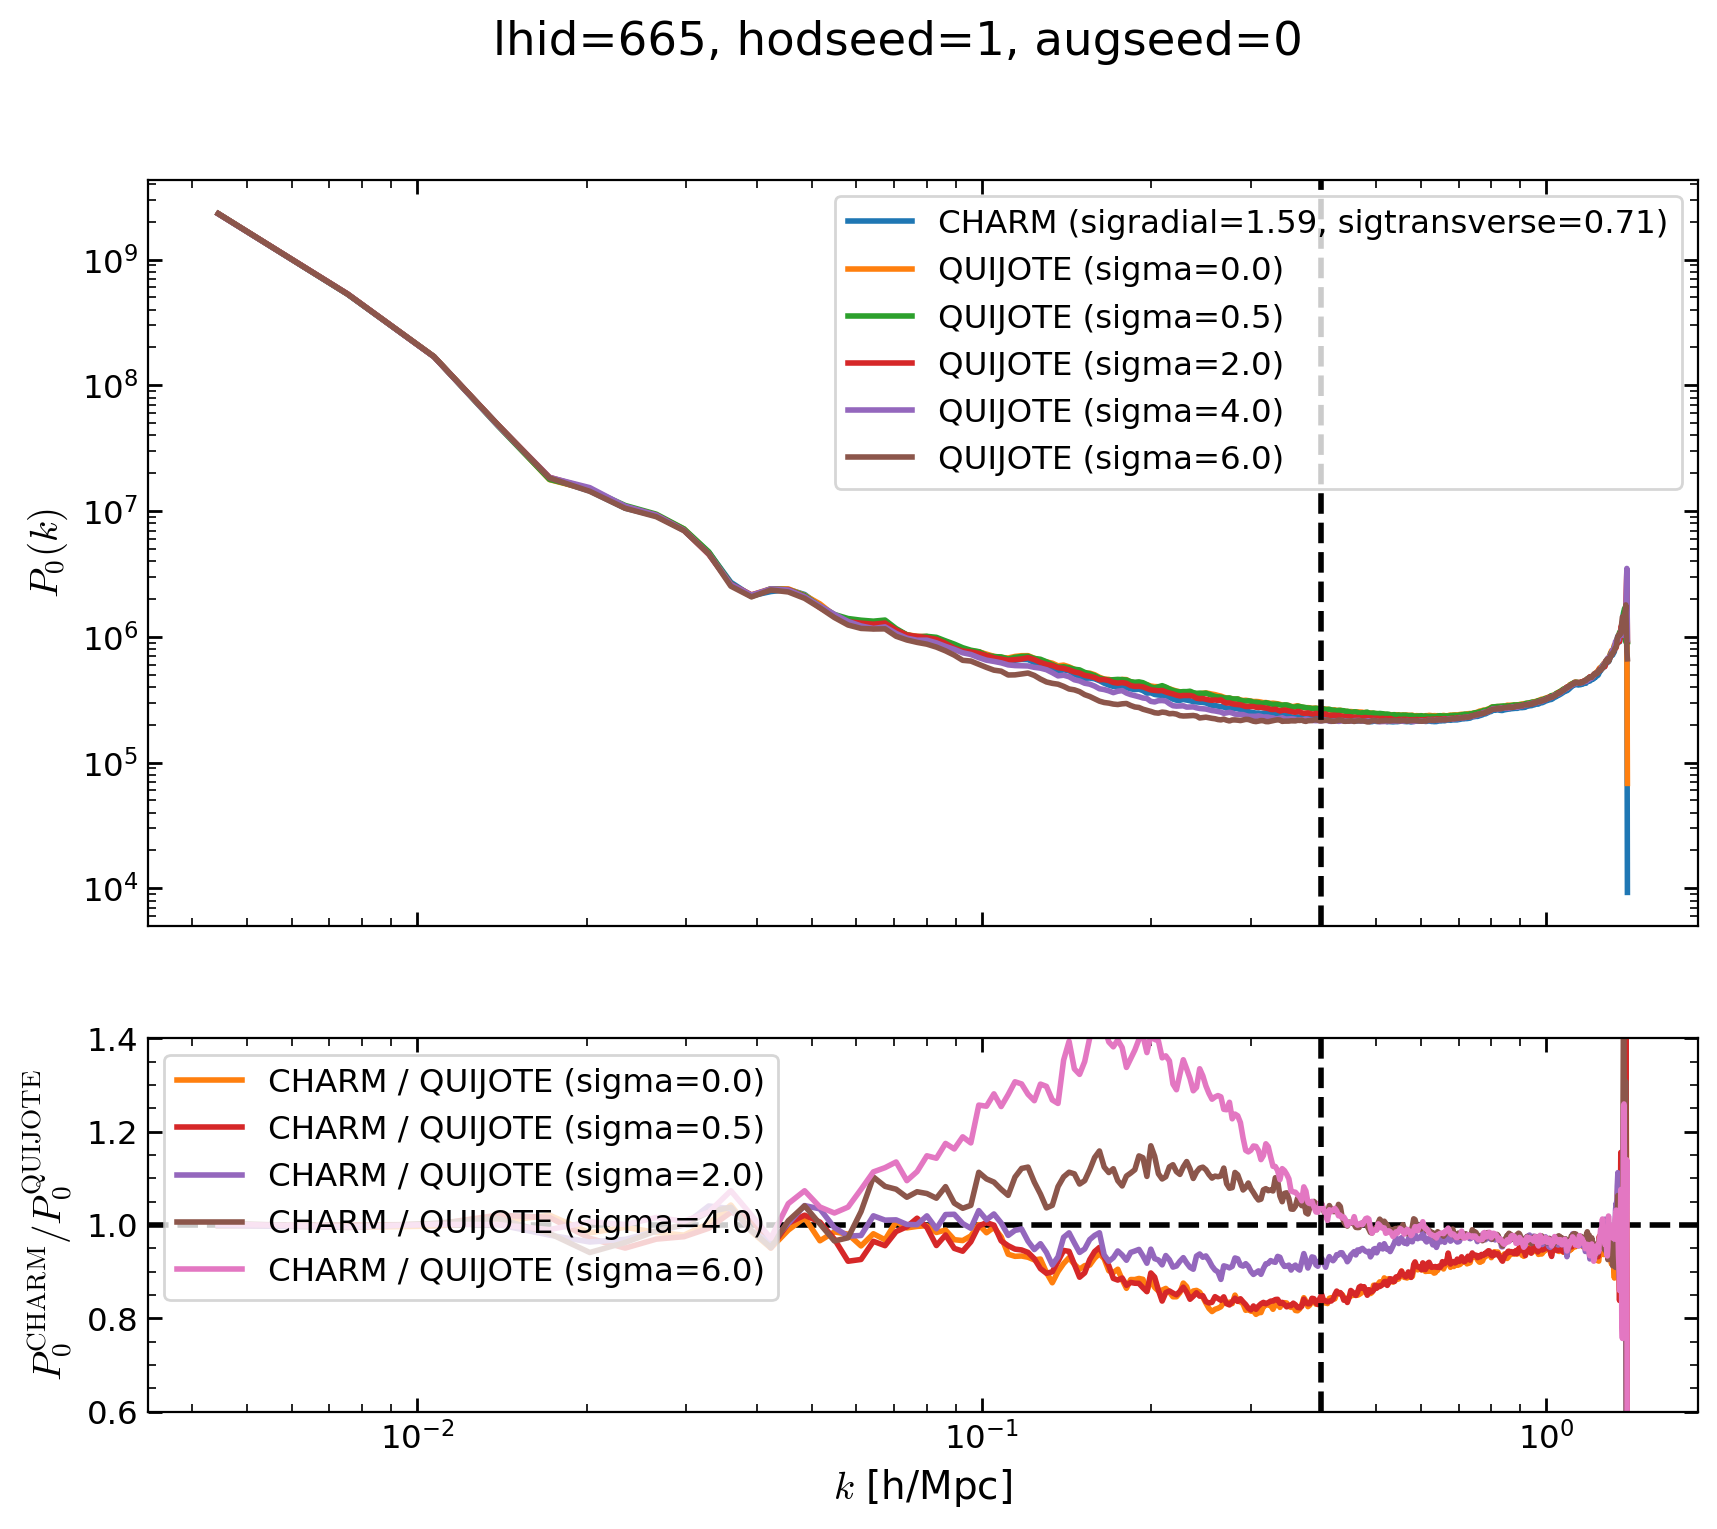

In [10]:


f, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True,
                      gridspec_kw={'height_ratios': [2, 1]})
ax = axs[0]
ax.loglog()
ax.plot(fsumms['Pk0']['k'], fsumms['Pk0']['value'],
        label=f'CHARM (sigradial={fparams[1][0]:.2f}, sigtransverse={fparams[1][1]:.2f})')
ax.plot(nsumms['Pk0']['k'], nsumms['Pk0']['value'], label='QUIJOTE (sigma=0.0)')
ax.plot(qsumms['Pk0']['k'], qsumms['Pk0']['value'], label='QUIJOTE (sigma=0.5)')
ax.plot(tsumms['Pk0']['k'], tsumms['Pk0']['value'], label='QUIJOTE (sigma=2.0)')
ax.plot(osumms['Pk0']['k'], osumms['Pk0']['value'], label='QUIJOTE (sigma=4.0)')
ax.plot(ssumms['Pk0']['k'], ssumms['Pk0']['value'], label='QUIJOTE (sigma=6.0)')

ax.set_ylabel(r'$P_0(k)$')
ax.axvline(0.4, color='k', linestyle='--')
ax.legend()

ax = axs[1]
ax.semilogx()
ax.axhline(1, color='k', linestyle='--')
ax.plot(fsumms['Pk0']['k'], fsumms['Pk0']['value'] / nsumms['Pk0']
        ['value'], c='C1', label='CHARM / QUIJOTE (sigma=0.0)')
ax.plot(fsumms['Pk0']['k'], fsumms['Pk0']['value'] / qsumms['Pk0']
        ['value'], c='C3', label='CHARM / QUIJOTE (sigma=0.5)')
ax.plot(fsumms['Pk0']['k'], fsumms['Pk0']['value'] / tsumms['Pk0']
        ['value'], c='C4', label='CHARM / QUIJOTE (sigma=2.0)')
ax.plot(fsumms['Pk0']['k'], fsumms['Pk0']['value'] / osumms['Pk0']
        ['value'], c='C5', label='CHARM / QUIJOTE (sigma=4.0)')
ax.plot(fsumms['Pk0']['k'], fsumms['Pk0']['value'] / ssumms['Pk0']
        ['value'], c='C6', label='CHARM / QUIJOTE (sigma=6.0)')
ax.set_xlabel(r'$k$ [h/Mpc]')
ax.set_ylabel(r'$P_0^{\rm CHARM}/P_0^{\rm QUIJOTE}$')
ax.set_ylim(0.6, 1.4)
ax.axvline(0.4, color='k', linestyle='--')
ax.legend()

f.suptitle(f'lhid={lhid}, hodseed={hodseed}, augseed={augseed}')

Loading Noise Parameters:   0%|          | 0/1000 [00:00<?, ?it/s]

Loading Noise Parameters: 100%|██████████| 1000/1000 [00:07<00:00, 136.74it/s]


Text(0, 0.5, 'Frequency')

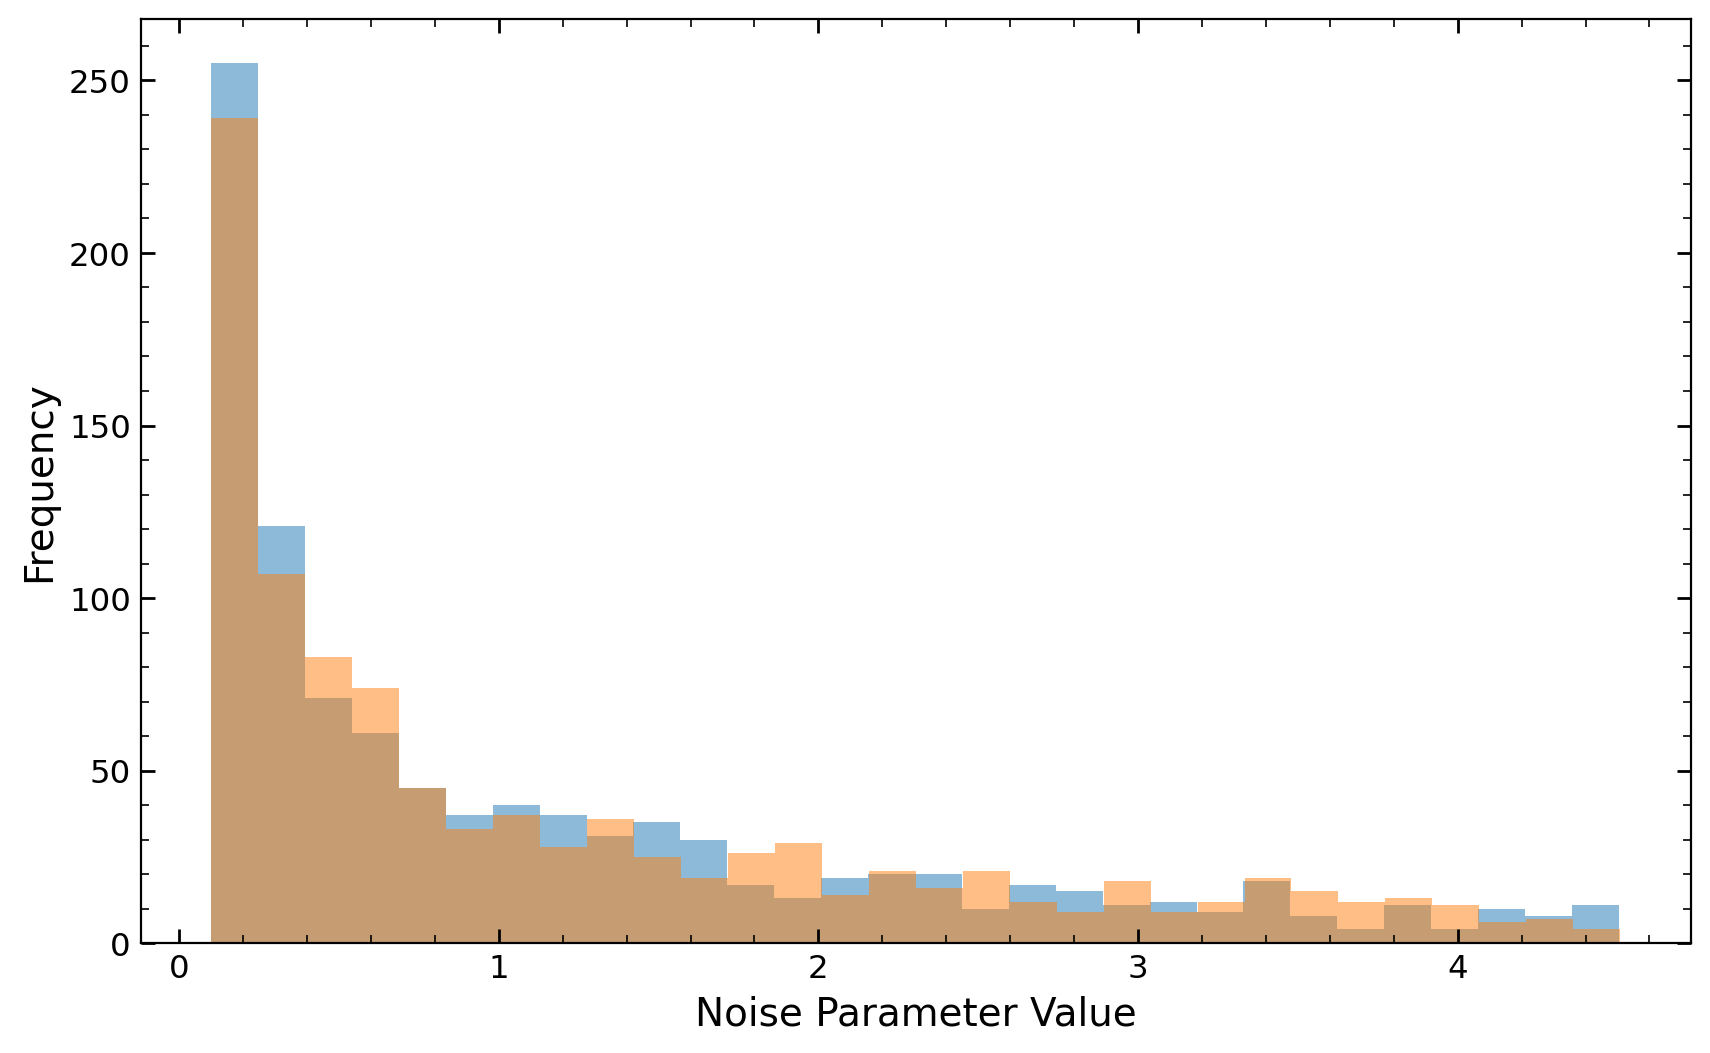

In [11]:
# Set up the simulation configuration for CHARM
nbody = 'quijotelike'
sim = 'fastpm_recnoise'
L, N = 1000, 128
suite_dir = join(wdir, nbody, sim, f'L{L}-N{N}')
tracer = 'simbig_lightcone'
augseed = 0

# A list to store the noise parameters
noise_params_list = []

# Loop until we have 100 valid samples
pbar = tqdm(total=1000, desc="Loading Noise Parameters")
while len(noise_params_list) < 1000:
    # Generate random lhid and hodseed
    lhid_rand = np.random.randint(0, 2000)
    hodseed_rand = np.random.randint(0, 5)

    try:
        # Construct the file path
        simpath_rand = join(suite_dir, str(lhid_rand))
        filepath_rand = join(simpath_rand, 'diag', tracer,
                             f'hod{lhid_rand*10+hodseed_rand:05}_aug{augseed:05}.h5')

        # Load noise parameters and append to the list
        params = get_noise_params(filepath_rand)
        noise_params_list.append(params)
        pbar.update(1)

    except FileNotFoundError:
        # If the file doesn't exist, skip to the next random combination
        continue
pbar.close()

# Convert the list to a pandas DataFrame for easier plotting
noise_df = pd.DataFrame(noise_params_list, columns=[
                        r'$\sigma_{\rm radial}$', r'$\sigma_{\rm transverse}$'])

# Plot the distribution of noise parameters
f, ax = plt.subplots(figsize=(10, 6))
ax.hist(noise_df[r'$\sigma_{\rm radial}$'], bins=30,
        alpha=0.5, label=r'$\sigma_{\rm radial}$')
ax.hist(noise_df[r'$\sigma_{\rm transverse}$'], bins=30,
        alpha=0.5, label=r'$\sigma_{\rm transverse}$')
ax.set_xlabel('Noise Parameter Value')
ax.set_ylabel('Frequency')

In [12]:
charm_suite_dir = join(wdir, 'quijotelike', 'fastpm_recnoise', 'L1000-N128')
low_noise_pairs = []

search_range = range(0, 2000)  # lhid in [0, 1999]
for lhid in tqdm(search_range, desc="Finding low-noise sims"):
    for hodseed in range(2):  # hodseed in [0, 4]
        filepath = join(charm_suite_dir, str(lhid), 'diag', tracer,
                        f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')

        if not os.path.exists(filepath):
            continue

        try:
            sig_rad, sig_trans = get_noise_params(filepath)
            if sig_rad < 0.5 and sig_trans < 0.5:
                low_noise_pairs.append(
                    {'lhid': lhid, 'hodseed': hodseed, 'sig_rad': sig_rad, 'sig_trans': sig_trans})
        except (FileNotFoundError, KeyError, OSError):
            continue

print(f"Found {len(low_noise_pairs)} combinations with noise parameters < 0.5")

Finding low-noise sims: 100%|██████████| 2000/2000 [00:15<00:00, 129.19it/s]

Found 353 combinations with noise parameters < 0.5


In [ ]:
# --- Initialize lists to store the ratio vectors ---
ratios_nonoise = []
ratios_05noise = []
ratios_2noise = []
ratios_4noise = []
ratios_6noise = []
k_values = None  # To store the k-values

# --- Loop through the found pairs to collect data ---
for pair in tqdm(low_noise_pairs, desc="Loading and processing Pk data"):
    lhid = pair['lhid']
    hodseed = pair['hodseed']
    augseed = 0

    try:
        # Define paths for all three simulations
        charm_path = join(wdir, 'quijotelike', 'fastpm_recnoise', f'L1000-N128',
                          str(lhid), 'diag', tracer, f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')
        nonoise_path = join(wdir, 'quijote', 'nbody_nonoise', f'L1000-N128', str(
            lhid), 'diag', tracer, f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')
        qnoise_path = join(wdir, 'quijote', 'nbody_0.5noise', f'L1000-N128', str(
            lhid), 'diag', tracer, f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')
        tnoise_path = join(wdir, 'quijote', 'nbody_2noise', f'L1000-N128', str(lhid),
                           'diag', tracer, f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')
        onoise_path = join(wdir, 'quijote', 'nbody_4noise', f'L1000-N128', str(lhid),
                           'diag', tracer, f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')
        snoise_path = join(wdir, 'quijote', 'nbody_6noise', f'L1000-N128', str(lhid),
                           'diag', tracer, f'hod{lhid*10+hodseed:05}_aug{augseed:05}.h5')

        # Load the power spectra
        fsumms = load_lc_Pk(charm_path)
        nsumms = load_lc_Pk(nonoise_path)
        qsumms = load_lc_Pk(qnoise_path)
        tsumms = load_lc_Pk(tnoise_path)
        osumms = load_lc_Pk(onoise_path)
        ssumms = load_lc_Pk(snoise_path)

        # Calculate and append the ratios
        ratios_nonoise.append(fsumms['Pk0']['value'] / nsumms['Pk0']['value'])
        ratios_05noise.append(fsumms['Pk0']['value'] / qsumms['Pk0']['value'])
        ratios_2noise.append(fsumms['Pk0']['value'] / tsumms['Pk0']['value'])
        ratios_4noise.append(fsumms['Pk0']['value'] / osumms['Pk0']['value'])
        ratios_6noise.append(fsumms['Pk0']['value'] / ssumms['Pk0']['value'])

        # Store the k-values (they should all be the same)
        if k_values is None:
            k_values = fsumms['Pk0']['k']

    except (FileNotFoundError, KeyError):
        # Skip this lhid/hodseed pair if any file is missing or corrupt
        print(
            f"Skipping pair lhid={lhid}, hodseed={hodseed} due to missing/bad data.")
        continue

# --- Convert lists to numpy arrays (tensors) and calculate statistics ---
tensor_nonoise = np.array(ratios_nonoise)
tensor_05noise = np.array(ratios_05noise)
tensor_2noise = np.array(ratios_2noise)
tensor_4noise = np.array(ratios_4noise)
tensor_6noise = np.array(ratios_6noise)

Loading and processing Pk data: 100%|██████████| 353/353 [00:13<00:00, 25.74it/s]


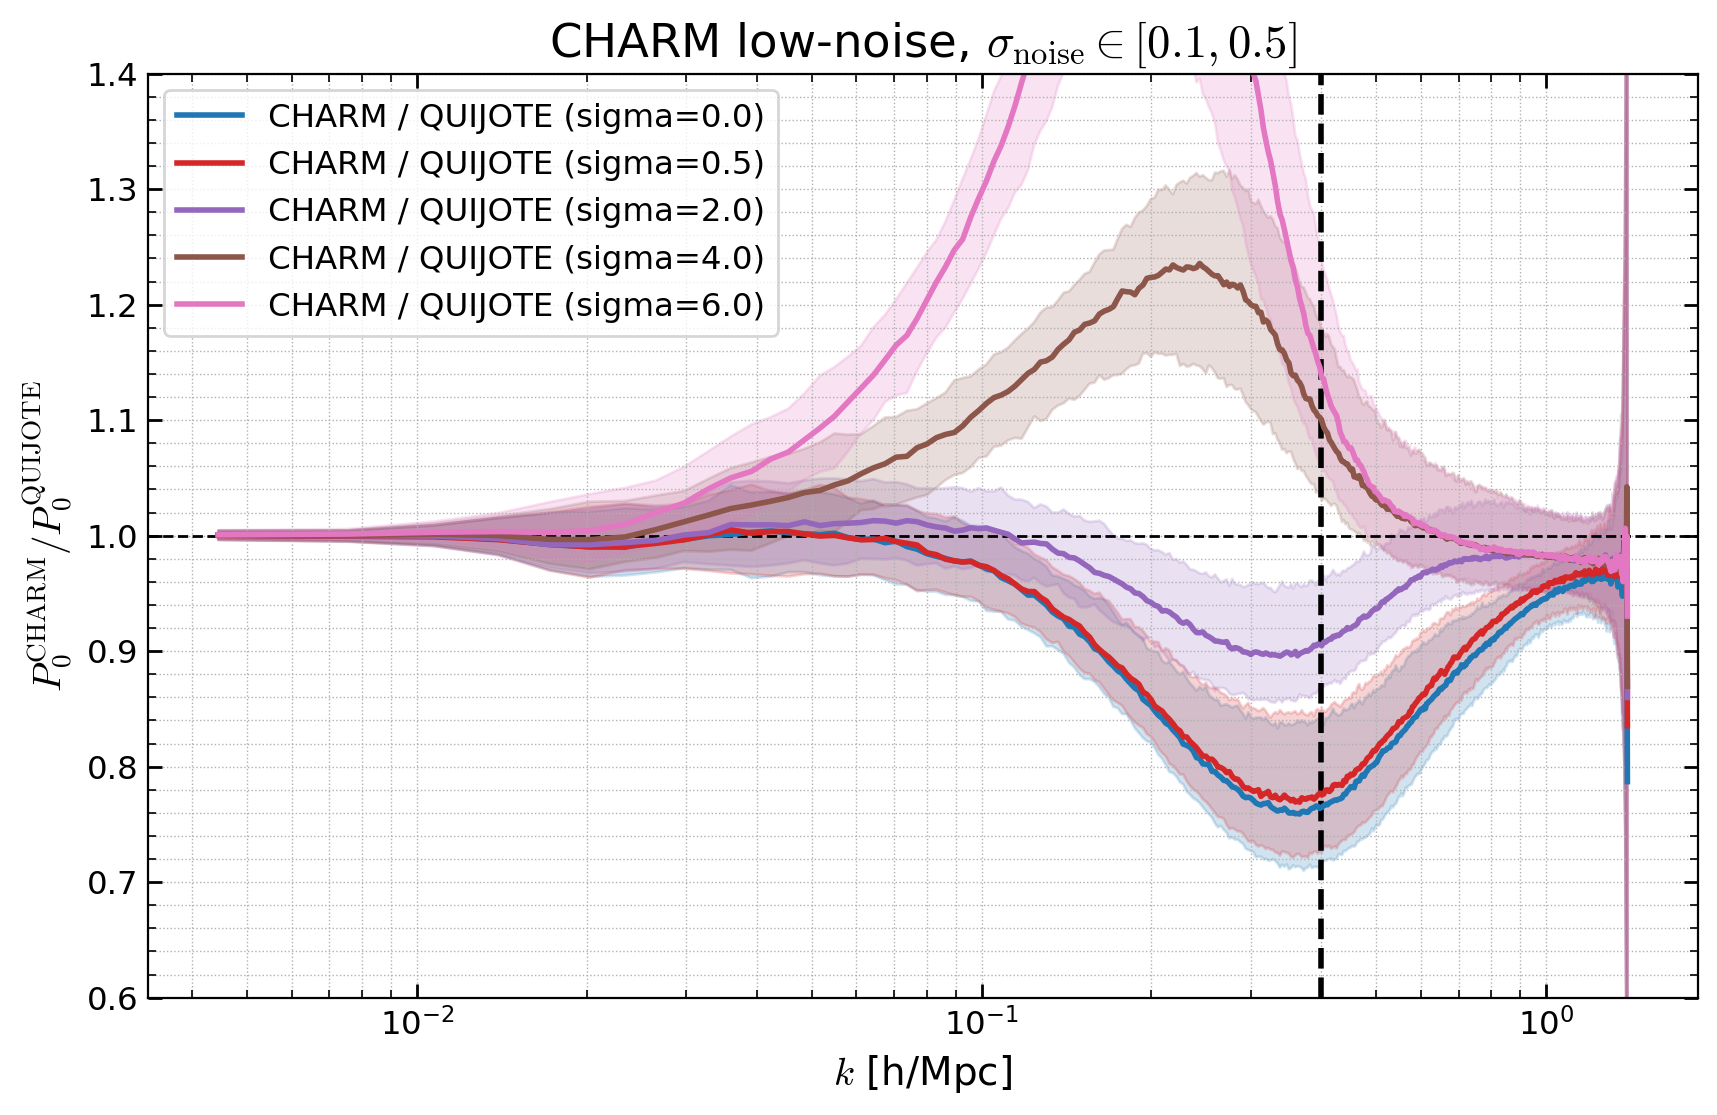

In [16]:
# Calculate the median (50th) and 1-sigma (16th, 84th) percentiles along axis=0
p16_n, med_n, p84_n = np.percentile(tensor_nonoise, [16, 50, 84], axis=0)
p16_q, med_q, p84_q = np.percentile(tensor_05noise, [16, 50, 84], axis=0)

# --- Create the plot ---
f, ax = plt.subplots(figsize=(10, 6))
ax.semilogx()
ax.axhline(1, color='k', linestyle='--', lw=1)
ax.axvline(0.4, color='k', linestyle='--')

# Plot the median and the 1-sigma shaded region for the nonoise ratio
ax.plot(k_values, med_n, color='C0', label='CHARM / QUIJOTE (sigma=0.0)')
ax.fill_between(k_values, p16_n, p84_n, color='C0', alpha=0.2)

# Plot the median and the 1-sigma shaded region for the 0.5noise ratio
ax.plot(k_values, med_q, color='C3', label='CHARM / QUIJOTE (sigma=0.5)')
ax.fill_between(k_values, p16_q, p84_q, color='C3', alpha=0.2)

# Plot the median and the 1-sigma shaded region for the 2noise ratio
p16_t, med_t, p84_t = np.percentile(tensor_2noise, [16, 50, 84], axis=0)
ax.plot(k_values, med_t, color='C4', label='CHARM / QUIJOTE (sigma=2.0)')
ax.fill_between(k_values, p16_t, p84_t, color='C4', alpha=0.2)

# Plot the median and the 1-sigma shaded region for the 4noise ratio
p16_o, med_o, p84_o = np.percentile(tensor_4noise, [16, 50, 84], axis=0)
ax.plot(k_values, med_o, color='C5', label='CHARM / QUIJOTE (sigma=4.0)')
ax.fill_between(k_values, p16_o, p84_o, color='C5', alpha=0.2)

# Plot the median and the 1-sigma shaded region for the 6noise ratio
p16_s, med_s, p84_s = np.percentile(tensor_6noise, [16, 50, 84], axis=0)
ax.plot(k_values, med_s, color='C6', label='CHARM / QUIJOTE (sigma=6.0)')
ax.fill_between(k_values, p16_s, p84_s, color='C6', alpha=0.2)

ax.set_xlabel(r'$k$ [h/Mpc]')
ax.set_ylabel(r'$P_0^{\rm CHARM}/P_0^{\rm QUIJOTE}$')
ax.set_title(r'CHARM low-noise, $\sigma_{\rm noise}\in[0.1, 0.5]$')
ax.set_ylim(0.6, 1.4)
ax.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.show()